In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
# параметры распределений
mu0, sigma0 = -2., 1.
mu1, sigma1 = 3., 2.

In [5]:
def sample(d0, d1, n=32):
    x0 = d0.sample((n,))
    x1 = d1.sample((n,))
    y0 = torch.zeros((n, 1))
    y1 = torch.ones((n, 1))
    return torch.cat([x0, x1], 0), torch.cat([y0, y1], 0)

In [6]:
d0 = torch.distributions.Normal(torch.tensor([mu0]), torch.tensor([sigma0]))
d1 = torch.distributions.Normal(torch.tensor([mu1]), torch.tensor([sigma1]))

In [7]:
layer = nn.Linear(1, 1)
print([p.data[0] for p in layer.parameters()])
layer_opt = optim.SGD(lr=1e-3, params=list(layer.parameters()))

[tensor([-0.5414]), tensor(0.6385)]


In [8]:
log_freq = 500
for i in range(10000):
    if i%log_freq == 0:
        with torch.no_grad():
            x, y = sample(d0, d1, 100000)
            out = F.sigmoid(layer(x))
            loss = F.binary_cross_entropy(out, y)
        print('Ошибка после %d итераций: %f' %(i/log_freq, loss))
    layer_opt.zero_grad()
    x, y = sample(d0, d1, 1024)
    out = F.sigmoid(layer(x))
    loss = F.binary_cross_entropy(out, y)
    loss.backward()
    layer_opt.step()

/home/dlabazkin/miniconda3/envs/ml/lib/python3.6/site-packages/torch/nn/functional.py:1006: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Ошибка после 0 итераций: 1.658910
Ошибка после 1 итераций: 0.559623
Ошибка после 2 итераций: 0.351746
Ошибка после 3 итераций: 0.274226
Ошибка после 4 итераций: 0.233709
Ошибка после 5 итераций: 0.210294
Ошибка после 6 итераций: 0.193648
Ошибка после 7 итераций: 0.181945
Ошибка после 8 итераций: 0.172948
Ошибка после 9 итераций: 0.167588
Ошибка после 10 итераций: 0.162250
Ошибка после 11 итераций: 0.157200
Ошибка после 12 итераций: 0.154370
Ошибка после 13 итераций: 0.150882
Ошибка после 14 итераций: 0.149199
Ошибка после 15 итераций: 0.147636
Ошибка после 16 итераций: 0.145987
Ошибка после 17 итераций: 0.144566
Ошибка после 18 итераций: 0.141754
Ошибка после 19 итераций: 0.140956


In [9]:
x_scale = np.linspace(-10, 10, 5000)
d0_pdf = stats.norm.pdf(x_scale, mu0, sigma0) 
d1_pdf = stats.norm.pdf(x_scale, mu1, sigma1)
x_tensor = torch.tensor(x_scale.reshape(-1, 1), dtype=torch.float)
with torch.no_grad():
    dist = F.sigmoid(layer(x_tensor)).numpy()
ratio = d1_pdf / (d1_pdf + d0_pdf)

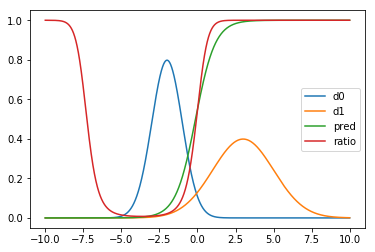

In [10]:
plt.plot(x_scale, d0_pdf*2, label='d0') # умножение на 2 для красоты графиков, на распределения не влияет
plt.plot(x_scale, d1_pdf*2, label='d1')
plt.plot(x_scale, dist.flatten(), label='pred')
plt.plot(x_scale, ratio, label='ratio')
plt.legend();

In [11]:
print([p.data[0] for p in layer.parameters()])

[tensor([1.5463]), tensor(0.1995)]


In [12]:
torch.log(F.sigmoid(torch.tensor(-100.)))

tensor(-inf)

In [13]:
F.logsigmoid(torch.tensor(-100.))

tensor(-100.)